# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

         0         1  2
0  0.78051 -0.063669  1
1  0.28774  0.291390  1
2  0.40714  0.178780  1
3  0.29230  0.421700  1
4  0.50922  0.352560  1


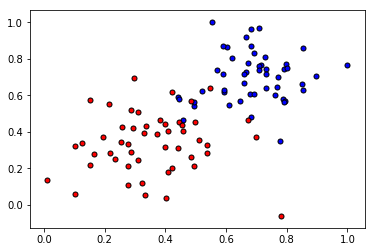

In [47]:
data = pd.read_csv('data.csv', header=None)
print(data.head())
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [48]:
x = X[0]
print('Shape of matrix X:', X.shape)
print('Single input x:', x)
print('Shape of line x:', x.shape)

Shape of matrix X: (100, 2)
Single input x: [ 0.78051  -0.063669]
Shape of line x: (2,)


## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [60]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    """Takes in a SINGLE coordinate, some weights and a bias
    and outputs a prediction"""
    return sigmoid(bias + np.matmul(features, weights))

# Error (log-loss) formula
def error_formula(y, output):
    """Takes in an ARRAY of target outcomes,
             an array of predicted outcomes,
       and compares the average of them"""
    return -y*np.log(output) - (1 - y)*np.log(1 - output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    """Takes in an input coordinate"""
    for i in range(len(weights)):
        y_hat = output_formula(x, weights, bias)
        weights[i] = weights[i] + learnrate*(y - y_hat)*x[i]
    bias = bias + learnrate*(y - y_hat)
    return weights, bias


## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [61]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7136031291338365
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225524801789181
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548522230484728
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.5015914616510496
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.45932419227007487
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.4252499060996503
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.39734315982644214
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741456628765907
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.3545995240401616
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379278676932719
Accuracy:  0.94


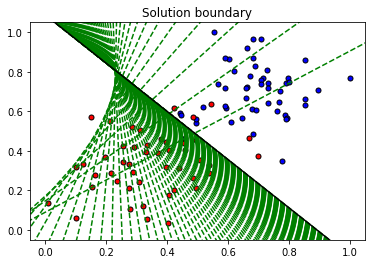

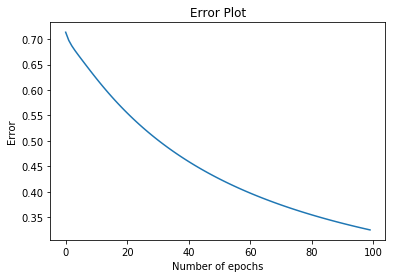

In [62]:
train(X, y, epochs, learnrate, True)